In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns

# raw data array dimesnsions

In [16]:
raw_data_folder="../data_extractor/128/"

In [17]:
print(os.listdir(raw_data_folder))

['.DS_Store', 'train_images.npy', 'test_images.npy', 'test_labels.npy', 'train_labels.npy']


In [4]:
X_train=np.load(raw_data_folder+"train_images.npy")
y_train=np.load(raw_data_folder+"train_labels.npy")
X_test=np.load(raw_data_folder+"test_images.npy")
y_test=np.load(raw_data_folder+"test_labels.npy")

In [5]:
X_train.shape

(1313, 128, 128, 3)

In [6]:
y_train.shape

(1313,)

In [7]:
X_test.shape

(1539, 128, 128, 3)

In [8]:
y_test.shape

(1539,)

# feature extraction

In [18]:
list_of_architectures = [
    "Xception",
    "VGG16",
    "VGG19",
    "ResNet50",
    "ResNet101",
    "ResNet152",
    "ResNet50V2",
    "ResNet101V2",
    "ResNet152V2",
    "InceptionV3",
    "InceptionResNetV2",
    "MobileNet",
    "MobileNetV2",
    "DenseNet121",
    "DenseNet169",
    "DenseNet201"
    
]

In [19]:
feature_extraction_folder="../feature_extractor/last_layer/128/"

In [20]:
for model in list_of_architectures:
    X=np.load(feature_extraction_folder+model+'_train_images.npy')
    print (model, X.shape)

Xception (1313, 32768)
VGG16 (1313, 8192)
VGG19 (1313, 8192)
ResNet50 (1313, 32768)
ResNet101 (1313, 32768)
ResNet152 (1313, 32768)
ResNet50V2 (1313, 32768)
ResNet101V2 (1313, 32768)
ResNet152V2 (1313, 32768)
InceptionV3 (1313, 8192)
InceptionResNetV2 (1313, 6144)
MobileNet (1313, 16384)
MobileNetV2 (1313, 20480)
DenseNet121 (1313, 16384)
DenseNet169 (1313, 26624)
DenseNet201 (1313, 30720)


In [21]:
feature_extraction_folder="../feature_extractor/last_layer/256/"

In [22]:
for model in list_of_architectures:
    X=np.load(feature_extraction_folder+model+'_train_images.npy')
    print (model, X.shape)

Xception (1313, 131072)
VGG16 (1313, 32768)
VGG19 (1313, 32768)
ResNet50 (1313, 131072)
ResNet101 (1313, 131072)
ResNet152 (1313, 131072)
ResNet50V2 (1313, 131072)
ResNet101V2 (1313, 131072)
ResNet152V2 (1313, 131072)
InceptionV3 (1313, 73728)
InceptionResNetV2 (1313, 55296)
MobileNet (1313, 65536)
MobileNetV2 (1313, 81920)
DenseNet121 (1313, 65536)
DenseNet169 (1313, 106496)
DenseNet201 (1313, 122880)


In [30]:
y=np.load(raw_data_folder+'test_labels.npy')

In [31]:
y

array(['apple', 'apple', 'apple', ..., 'yahoo', 'yahoo', 'yahoo'],
      dtype='<U10')

# feature fusion

# smote data

In [33]:
analysis_data_folder="../classifier/output/multiclass/"


In [36]:
df=pd.read_csv(analysis_data_folder + "last_layer_smote_fusion_2_RF_128_256.csv")

In [20]:
df.head()

,classifier,model1,model2,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
0,RF,Xception,VGG16,128,0.838,0.852,0.838,0.841,0.752,0.727,0.752,0.739,0.984,0.982,0.016,0.248,0.273,0.978
1,RF,Xception,VGG19,128,0.826,0.842,0.826,0.829,0.746,0.728,0.746,0.737,0.983,0.980,0.017,0.254,0.272,0.977
2,RF,Xception,ResNet50,128,0.793,0.813,0.793,0.797,0.659,0.648,0.659,0.653,0.979,0.977,0.021,0.341,0.352,0.972
3,RF,Xception,ResNet101,128,0.797,0.815,0.797,0.800,0.669,0.674,0.669,0.671,0.979,0.977,0.021,0.331,0.326,0.973
4,RF,Xception,ResNet152,128,0.806,0.817,0.806,0.807,0.659,0.675,0.659,0.667,0.979,0.979,0.021,0.341,0.325,0.974


In [7]:
df.shape

(240, 18)

In [36]:
df.describe()

,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,192.000000,0.854350,0.862242,0.854350,0.852588,0.719333,0.801479,0.719333,0.757313,0.982650,0.984613,0.017350,0.280667,0.198521,0.980592
std,64.133751,0.032185,0.022831,0.032185,0.028498,0.032332,0.063257,0.032332,0.041911,0.002271,0.004194,0.002271,0.032332,0.063257,0.004306
min,128.000000,0.718000,0.786000,0.718000,0.738000,0.635000,0.581000,0.635000,0.611000,0.976000,0.969000,0.014000,0.212000,0.099000,0.962000
25%,128.000000,0.842750,0.852750,0.842750,0.841000,0.694000,0.782500,0.694000,0.741000,0.981000,0.983000,0.016000,0.256000,0.157750,0.979000
50%,192.000000,0.863000,0.868000,0.863000,0.859500,0.724000,0.813000,0.724000,0.764000,0.983000,0.986000,0.017000,0.276000,0.187000,0.982000
75%,256.000000,0.876250,0.878250,0.876250,0.872250,0.744000,0.842250,0.744000,0.787000,0.984000,0.988000,0.019000,0.306000,0.217500,0.983250
max,256.000000,0.895000,0.894000,0.895000,0.891000,0.788000,0.901000,0.788000,0.824000,0.986000,0.990000,0.024000,0.365000,0.419000,0.986000


In [41]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option("display.max_colwidth", -1)
df[["model1", "model2"]]

<ipython-input-41-a23f9accd360>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,model1,model2
0,Xception,VGG16
1,Xception,VGG19
2,Xception,ResNet50
3,Xception,ResNet101
4,Xception,ResNet152
5,Xception,ResNet50V2
6,Xception,ResNet101V2
7,Xception,ResNet152V2
8,Xception,InceptionV3
9,Xception,InceptionResNetV2


In [8]:
list_of_architectures = [
    "Xception",
    "VGG16",
    "VGG19",
    "ResNet50V2",
    "ResNet101V2",
    "ResNet152V2",
    "InceptionV3",
    "InceptionResNetV2",
    "MobileNet",
    "MobileNetV2",
    "DenseNet121",
    "DenseNet169",
    "DenseNet201"
    
]

In [9]:
import tensorflow as tf
def getData(model1, model2, image_size):
    train_data_dir="../class_imabalance/" + layer + "/" + str(image_size)+"/"
    test_data_dir="../feature_extractor/" + layer + "/" + str(image_size)+"/"
    X_train1=np.load(train_data_dir+model1+"_X_train_SMOTE.npy")
    X_train2=np.load(train_data_dir+model2+"_X_train_SMOTE.npy")
    X_train = tf.keras.layers.concatenate([X_train1, X_train2],
                            axis=1)
    
    y_train=np.load(train_data_dir+model1+"_y_train_SMOTE.npy")
    
    X_test1=np.load(test_data_dir+model1+"_test_images.npy")
    X_test2=np.load(test_data_dir+model2+"_test_images.npy")
    X_test = tf.keras.layers.concatenate([X_test1, X_test2],
                            axis=1)
    
    y_test=np.load(test_data_dir+"test_labels.npy")
    
    
    return X_train, y_train, X_test, y_test

In [10]:
from itertools import combinations
list_of_combinations=[",".join(map(str, comb)) for comb in combinations(list_of_architectures, 2)]
list_of_combinations

['Xception,VGG16',
 'Xception,VGG19',
 'Xception,ResNet50V2',
 'Xception,ResNet101V2',
 'Xception,ResNet152V2',
 'Xception,InceptionV3',
 'Xception,InceptionResNetV2',
 'Xception,MobileNet',
 'Xception,MobileNetV2',
 'Xception,DenseNet121',
 'Xception,DenseNet169',
 'Xception,DenseNet201',
 'VGG16,VGG19',
 'VGG16,ResNet50V2',
 'VGG16,ResNet101V2',
 'VGG16,ResNet152V2',
 'VGG16,InceptionV3',
 'VGG16,InceptionResNetV2',
 'VGG16,MobileNet',
 'VGG16,MobileNetV2',
 'VGG16,DenseNet121',
 'VGG16,DenseNet169',
 'VGG16,DenseNet201',
 'VGG19,ResNet50V2',
 'VGG19,ResNet101V2',
 'VGG19,ResNet152V2',
 'VGG19,InceptionV3',
 'VGG19,InceptionResNetV2',
 'VGG19,MobileNet',
 'VGG19,MobileNetV2',
 'VGG19,DenseNet121',
 'VGG19,DenseNet169',
 'VGG19,DenseNet201',
 'ResNet50V2,ResNet101V2',
 'ResNet50V2,ResNet152V2',
 'ResNet50V2,InceptionV3',
 'ResNet50V2,InceptionResNetV2',
 'ResNet50V2,MobileNet',
 'ResNet50V2,MobileNetV2',
 'ResNet50V2,DenseNet121',
 'ResNet50V2,DenseNet169',
 'ResNet50V2,DenseNet201',


In [11]:
len(list_of_combinations)

78

In [65]:
lst=[]
layer="last_layer"
image_size=256
for models in list_of_combinations:
    model1 = models.split(",")[0]
    model2 = models.split(",")[1]
    X_train, y_train, X_test, y_test = getData(model1, model2, image_size)
    lst.append([model1, model2, X_train.shape, y_train.shape, X_test.shape, y_test.shape])

In [66]:
df=pd.DataFrame(lst)

In [67]:
df.shape

(78, 6)

In [68]:
df

,0,1,2,3,4,5
0,Xception,VGG16,"(6000, 163840)","(6000,)","(1539, 163840)","(1539,)"
1,Xception,VGG19,"(6000, 163840)","(6000,)","(1539, 163840)","(1539,)"
2,Xception,ResNet50V2,"(6000, 262144)","(6000,)","(1539, 262144)","(1539,)"
3,Xception,ResNet101V2,"(6000, 262144)","(6000,)","(1539, 262144)","(1539,)"
4,Xception,ResNet152V2,"(6000, 262144)","(6000,)","(1539, 262144)","(1539,)"
5,Xception,InceptionV3,"(6000, 204800)","(6000,)","(1539, 204800)","(1539,)"
6,Xception,InceptionResNetV2,"(6000, 186368)","(6000,)","(1539, 186368)","(1539,)"
7,Xception,MobileNet,"(6000, 196608)","(6000,)","(1539, 196608)","(1539,)"
8,Xception,MobileNetV2,"(6000, 212992)","(6000,)","(1539, 212992)","(1539,)"
9,Xception,DenseNet121,"(6000, 196608)","(6000,)","(1539, 196608)","(1539,)"


In [12]:
list_of_architectures = [
    "VGG16",
    "VGG19",
    "ResNet101V2",
    "ResNet152V2",
    "InceptionV3",
    "MobileNet",
    "MobileNetV2",
    "DenseNet121",
    "DenseNet169",
    "DenseNet201"
    
]

In [13]:
from itertools import combinations
list_of_combinations=[",".join(map(str, comb)) for comb in combinations(list_of_architectures, 3)]
list_of_combinations

['VGG16,VGG19,ResNet101V2',
 'VGG16,VGG19,ResNet152V2',
 'VGG16,VGG19,InceptionV3',
 'VGG16,VGG19,MobileNet',
 'VGG16,VGG19,MobileNetV2',
 'VGG16,VGG19,DenseNet121',
 'VGG16,VGG19,DenseNet169',
 'VGG16,VGG19,DenseNet201',
 'VGG16,ResNet101V2,ResNet152V2',
 'VGG16,ResNet101V2,InceptionV3',
 'VGG16,ResNet101V2,MobileNet',
 'VGG16,ResNet101V2,MobileNetV2',
 'VGG16,ResNet101V2,DenseNet121',
 'VGG16,ResNet101V2,DenseNet169',
 'VGG16,ResNet101V2,DenseNet201',
 'VGG16,ResNet152V2,InceptionV3',
 'VGG16,ResNet152V2,MobileNet',
 'VGG16,ResNet152V2,MobileNetV2',
 'VGG16,ResNet152V2,DenseNet121',
 'VGG16,ResNet152V2,DenseNet169',
 'VGG16,ResNet152V2,DenseNet201',
 'VGG16,InceptionV3,MobileNet',
 'VGG16,InceptionV3,MobileNetV2',
 'VGG16,InceptionV3,DenseNet121',
 'VGG16,InceptionV3,DenseNet169',
 'VGG16,InceptionV3,DenseNet201',
 'VGG16,MobileNet,MobileNetV2',
 'VGG16,MobileNet,DenseNet121',
 'VGG16,MobileNet,DenseNet169',
 'VGG16,MobileNet,DenseNet201',
 'VGG16,MobileNetV2,DenseNet121',
 'VGG16,Mo

In [14]:
len(list_of_combinations)

120

In [72]:
import tensorflow as tf
def getData(model1, model2, model3, image_size):
    train_data_dir="../class_imabalance/" + layer + "/" + str(image_size)+"/"
    test_data_dir="../feature_extractor/" + layer + "/" + str(image_size)+"/"
    X_train1=np.load(train_data_dir+model1+"_X_train_SMOTE.npy")
    X_train2=np.load(train_data_dir+model2+"_X_train_SMOTE.npy")
    X_train3=np.load(train_data_dir+model3+"_X_train_SMOTE.npy")
    X_train = tf.keras.layers.concatenate([X_train1, X_train2, X_train3],
                            axis=1)
    
    y_train=np.load(train_data_dir+model1+"_y_train_SMOTE.npy")
    
    X_test1=np.load(test_data_dir+model1+"_test_images.npy")
    X_test2=np.load(test_data_dir+model2+"_test_images.npy")
    X_test3=np.load(test_data_dir+model3+"_test_images.npy")
    X_test = tf.keras.layers.concatenate([X_test1, X_test2, X_test3],
                            axis=1)
    
    y_test=np.load(test_data_dir+"test_labels.npy")
    
    
    return X_train, y_train, X_test, y_test

In [77]:
lst=[]
layer="last_layer"
image_size=256
for models in list_of_combinations:
    model1 = models.split(",")[0]
    model2 = models.split(",")[1]
    model3 = models.split(",")[2]
    X_train, y_train, X_test, y_test = getData(model1, model2, model3, image_size)
    lst.append([model1, model2, model3, X_train.shape, y_train.shape, X_test.shape, y_test.shape])

In [78]:
df=pd.DataFrame(lst)
df

,0,1,2,3,4,5,6
0,VGG16,VGG19,ResNet101V2,"(6000, 196608)","(6000,)","(1539, 196608)","(1539,)"
1,VGG16,VGG19,ResNet152V2,"(6000, 196608)","(6000,)","(1539, 196608)","(1539,)"
2,VGG16,VGG19,InceptionV3,"(6000, 139264)","(6000,)","(1539, 139264)","(1539,)"
3,VGG16,VGG19,MobileNet,"(6000, 131072)","(6000,)","(1539, 131072)","(1539,)"
4,VGG16,VGG19,MobileNetV2,"(6000, 147456)","(6000,)","(1539, 147456)","(1539,)"
5,VGG16,VGG19,DenseNet121,"(6000, 131072)","(6000,)","(1539, 131072)","(1539,)"
6,VGG16,VGG19,DenseNet169,"(6000, 172032)","(6000,)","(1539, 172032)","(1539,)"
7,VGG16,VGG19,DenseNet201,"(6000, 188416)","(6000,)","(1539, 188416)","(1539,)"
8,VGG16,ResNet101V2,ResNet152V2,"(6000, 294912)","(6000,)","(1539, 294912)","(1539,)"
9,VGG16,ResNet101V2,InceptionV3,"(6000, 237568)","(6000,)","(1539, 237568)","(1539,)"


In [42]:
input_folder="../classifier/output/binary/"
output_folder="output/"

In [43]:
import pandas as pd
import glob
import pandas as pd

def pd_read_pattern(pattern):
    files = glob.glob(pattern)
    #print(files)
    df = pd.DataFrame()
    for f in files:
        print(f)
        df = df.append(pd.read_csv(f))

    return df.reset_index(drop=True)



# All last layer results

In [44]:
df_last_layer = pd_read_pattern(input_folder+'last_layer*.csv')
print(df_last_layer.shape)
df_last_layer.head()

../classifier/output/binary/last_layer_smote_binary_SVM_128_256.csv
../classifier/output/binary/last_layer_smote_binary_RF_128_256.csv
(40, 17)


,classifier,model,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
0,SVM,VGG16,128,0.851,0.871,0.851,0.854,0.866,0.729,0.915,0.811,0.817,0.947,0.183,0.085,0.271,0.851
1,SVM,VGG19,128,0.829,0.860,0.829,0.833,0.851,0.691,0.926,0.791,0.777,0.951,0.223,0.074,0.309,0.829
2,SVM,ResNet101V2,128,0.815,0.858,0.815,0.819,0.845,0.666,0.944,0.781,0.745,0.961,0.255,0.056,0.334,0.815
3,SVM,ResNet152V2,128,0.808,0.852,0.808,0.812,0.837,0.658,0.937,0.773,0.738,0.956,0.262,0.063,0.342,0.808
4,SVM,InceptionV3,128,0.751,0.827,0.751,0.756,0.795,0.591,0.942,0.726,0.648,0.954,0.352,0.058,0.409,0.751


In [45]:
df_last_layer.describe()

,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,192.000000,0.833550,0.868700,0.833550,0.837150,0.859200,0.69400,0.944525,0.799500,0.773725,0.962775,0.226275,0.055475,0.30600,0.833550
std,64.815319,0.026294,0.015217,0.026294,0.025678,0.021079,0.03512,0.012066,0.024906,0.039251,0.008072,0.039251,0.012066,0.03512,0.026294
min,128.000000,0.751000,0.823000,0.751000,0.756000,0.794000,0.59100,0.915000,0.725000,0.648000,0.947000,0.156000,0.032000,0.23800,0.751000
25%,128.000000,0.821750,0.861750,0.821750,0.825750,0.850750,0.67475,0.936500,0.788250,0.755500,0.956000,0.201750,0.046000,0.28300,0.821750
50%,192.000000,0.838000,0.870500,0.838000,0.841500,0.863000,0.69800,0.944000,0.802500,0.780500,0.962500,0.219500,0.056000,0.30200,0.838000
75%,256.000000,0.850000,0.878250,0.850000,0.853000,0.871250,0.71700,0.954000,0.813250,0.798250,0.969000,0.244500,0.063500,0.32525,0.850000
max,256.000000,0.873000,0.895000,0.873000,0.875000,0.892000,0.76200,0.968000,0.838000,0.844000,0.980000,0.352000,0.085000,0.40900,0.873000


In [54]:
df_last_layer_RF=df_last_layer[df_last_layer.classifier=="RF"]
print(df_last_layer_RF.shape)
df_last_layer_RF_sorted=df_last_layer_RF.sort_values(by="recall", ascending=False)

(20, 17)


In [55]:
df_last_layer_SVM=df_last_layer[df_last_layer.classifier=="SVM"]
print(df_last_layer_SVM.shape)
df_last_layer_SVM_sorted=df_last_layer_SVM.sort_values(by="recall", ascending=False)

(20, 17)


In [56]:
df_last_layer_RF_sorted.to_csv(output_folder+"binary_RF.csv", index=False, header=True)

In [57]:
df_last_layer_SVM_sorted.to_csv(output_folder+"binary_SVM.csv", index=False, header=True)

In [120]:
df_last_layer[df_last_layer.balanced_accuracy==df_last_layer.balanced_accuracy.max()]

,classifier,model,image_size,n_components,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc,model1,model2,model3
224,SVM,DenseNet201,256,NaN,0.903,0.906,0.903,0.903,0.845,0.876,0.845,0.86,0.989,0.988,0.011,0.155,0.124,0.987,NaN,NaN,NaN


In [46]:
print("Xception", round(df_last_layer[df_last_layer.model=="Xception"].balanced_accuracy.max(),3))
print("VGG16", round(df_last_layer[df_last_layer.model=="VGG16"].balanced_accuracy.max(),3))
print("VGG19", round(df_last_layer[df_last_layer.model=="VGG19"].balanced_accuracy.max(),3))
print("ResNet50", round(df_last_layer[df_last_layer.model=="ResNet50"].balanced_accuracy.max(),3))
print("ResNet101", round(df_last_layer[df_last_layer.model=="ResNet101"].balanced_accuracy.max(),3))
print("ResNet152", round(df_last_layer[df_last_layer.model=="ResNet152"].balanced_accuracy.max(),3))
print("ResNet50V2", round(df_last_layer[df_last_layer.model=="ResNet50V2"].balanced_accuracy.max(),3))
print("ResNet101V2", round(df_last_layer[df_last_layer.model=="ResNet101V2"].balanced_accuracy.max(),3))
print("ResNet152V2", round(df_last_layer[df_last_layer.model=="ResNet152V2"].balanced_accuracy.max(),3))
print("InceptionV3", round(df_last_layer[df_last_layer.model=="InceptionV3"].balanced_accuracy.max(),3))
print("InceptionResNetV2", round(df_last_layer[df_last_layer.model=="InceptionResNetV2"].balanced_accuracy.max(),3))
print("MobileNet", round(df_last_layer[df_last_layer.model=="MobileNet"].balanced_accuracy.max(),3))
print("MobileNetV2", round(df_last_layer[df_last_layer.model=="MobileNetV2"].balanced_accuracy.max(),3))
print("DenseNet121", round(df_last_layer[df_last_layer.model=="DenseNet121"].balanced_accuracy.max(),3))
print("DenseNet169", round(df_last_layer[df_last_layer.model=="DenseNet169"].balanced_accuracy.max(),3))
print("DenseNet201", round(df_last_layer[df_last_layer.model=="DenseNet201"].balanced_accuracy.max(),3))

Xception nan
VGG16 0.885
VGG19 0.872
ResNet50 nan
ResNet101 nan
ResNet152 nan
ResNet50V2 nan
ResNet101V2 0.858
ResNet152V2 0.851
InceptionV3 0.841
InceptionResNetV2 nan
MobileNet 0.887
MobileNetV2 0.884
DenseNet121 0.883
DenseNet169 0.882
DenseNet201 0.892


In [47]:
print("Xception", round(df_last_layer[df_last_layer.model=="Xception"].accuracy.max(),3))
print("VGG16", round(df_last_layer[df_last_layer.model=="VGG16"].accuracy.max(),3))
print("VGG19", round(df_last_layer[df_last_layer.model=="VGG19"].accuracy.max(),3))
print("ResNet50", round(df_last_layer[df_last_layer.model=="ResNet50"].accuracy.max(),3))
print("ResNet101", round(df_last_layer[df_last_layer.model=="ResNet101"].accuracy.max(),3))
print("ResNet152", round(df_last_layer[df_last_layer.model=="ResNet152"].accuracy.max(),3))
print("ResNet50V2", round(df_last_layer[df_last_layer.model=="ResNet50V2"].accuracy.max(),3))
print("ResNet101V2", round(df_last_layer[df_last_layer.model=="ResNet101V2"].accuracy.max(),3))
print("ResNet152V2", round(df_last_layer[df_last_layer.model=="ResNet152V2"].accuracy.max(),3))
print("InceptionV3", round(df_last_layer[df_last_layer.model=="InceptionV3"].accuracy.max(),3))
print("InceptionResNetV2", round(df_last_layer[df_last_layer.model=="InceptionResNetV2"].accuracy.max(),3))
print("MobileNet", round(df_last_layer[df_last_layer.model=="MobileNet"].accuracy.max(),3))
print("MobileNetV2", round(df_last_layer[df_last_layer.model=="MobileNetV2"].accuracy.max(),3))
print("DenseNet121", round(df_last_layer[df_last_layer.model=="DenseNet121"].accuracy.max(),3))
print("DenseNet169", round(df_last_layer[df_last_layer.model=="DenseNet169"].accuracy.max(),3))
print("DenseNet201", round(df_last_layer[df_last_layer.model=="DenseNet201"].accuracy.max(),3))

Xception nan
VGG16 0.873
VGG19 0.849
ResNet50 nan
ResNet101 nan
ResNet152 nan
ResNet50V2 nan
ResNet101V2 0.834
ResNet152V2 0.822
InceptionV3 0.808
InceptionResNetV2 nan
MobileNet 0.864
MobileNetV2 0.862
DenseNet121 0.86
DenseNet169 0.86
DenseNet201 0.869


# Approach 3

# last layer SMOTE

In [123]:
df_last_layer_smote = pd_read_pattern(input_folder+'last_layer_smote_RF_SVM_128_256.csv')
print(df_last_layer_smote.shape)
df_last_layer_smote.head()

../classifier/output/multiclass/last_layer_smote_RF_SVM_128_256.csv
(64, 17)


,classifier,model,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
0,RF,Xception,128,0.802,0.810,0.802,0.802,0.644,0.659,0.644,0.651,0.979,0.978,0.021,0.356,0.341,0.974
1,RF,VGG16,128,0.885,0.887,0.885,0.880,0.721,0.840,0.721,0.776,0.985,0.989,0.015,0.279,0.160,0.985
2,RF,VGG19,128,0.862,0.862,0.862,0.858,0.725,0.798,0.725,0.760,0.983,0.986,0.017,0.275,0.202,0.982
3,RF,ResNet50,128,0.761,0.802,0.761,0.772,0.665,0.652,0.665,0.658,0.976,0.973,0.024,0.335,0.348,0.968
4,RF,ResNet101,128,0.762,0.790,0.762,0.769,0.641,0.666,0.641,0.653,0.976,0.973,0.024,0.359,0.334,0.968


In [124]:
df_last_layer_smote.describe()

,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,192.000000,0.826297,0.845313,0.826297,0.827469,0.712812,0.759141,0.712812,0.730156,0.980609,0.981516,0.019391,0.287187,0.240859,0.976859
std,64.505937,0.072197,0.043874,0.072197,0.063408,0.057880,0.124800,0.057880,0.077874,0.005113,0.008240,0.005113,0.057880,0.124800,0.009671
min,128.000000,0.593000,0.731000,0.593000,0.625000,0.612000,0.422000,0.612000,0.505000,0.967000,0.959000,0.011000,0.155000,0.063000,0.946000
25%,128.000000,0.801750,0.816750,0.801750,0.801500,0.664750,0.676500,0.664750,0.681500,0.978000,0.977000,0.015000,0.245500,0.154750,0.973750
50%,192.000000,0.848500,0.858500,0.848500,0.846000,0.719500,0.798500,0.719500,0.753500,0.982000,0.983500,0.018000,0.280500,0.201500,0.979500
75%,256.000000,0.877250,0.878250,0.877250,0.874250,0.754500,0.845250,0.754500,0.784500,0.985000,0.988250,0.022000,0.335250,0.323500,0.984000
max,256.000000,0.903000,0.906000,0.903000,0.903000,0.845000,0.937000,0.845000,0.860000,0.989000,0.992000,0.033000,0.388000,0.578000,0.987000


In [125]:
df_last_layer_smote.classifier.value_counts()

SVM    32
RF     32
Name: classifier, dtype: int64

# df_last_layer_smote_RF

In [176]:
df_last_layer_smote_RF=df_last_layer_smote[df_last_layer_smote.classifier=="RF"]
print(df_last_layer_smote_RF.shape)
df_last_layer_smote_RF.to_csv(output_folder+"df_last_layer_smote_RF.csv", index=False, header=True)

(32, 17)


# df_last_layer_smote_RF_128

In [177]:
df_last_layer_smote_RF_128=df_last_layer_smote_RF[df_last_layer_smote_RF.image_size==128]
print(df_last_layer_smote_RF_128.shape)
df_last_layer_smote_RF_128.to_csv(output_folder+"df_last_layer_smote_RF_128.csv", index=False, header=True)

# df_last_layer_smote_RF_256

In [178]:
df_last_layer_smote_RF_256=df_last_layer_smote_RF[df_last_layer_smote_RF.image_size==256]
print(df_last_layer_smote_RF_256.shape)
df_last_layer_smote_RF_256.to_csv(output_folder+"df_last_layer_smote_RF_256.csv", index=False, header=True)

# df_last_layer_smote_SVM

In [179]:
df_last_layer_smote_SVM=df_last_layer_smote[df_last_layer_smote.classifier=="SVM"]
print(df_last_layer_smote_SVM.shape)
df_last_layer_smote_SVM.to_csv(output_folder+"df_last_layer_smote_SVM.csv", index=False, header=True)

(32, 17)


# df_last_layer_smote_SVM_128

In [180]:
df_last_layer_smote_SVM_128=df_last_layer_smote_SVM[df_last_layer_smote_SVM.image_size==128]
print(df_last_layer_smote_SVM_128.shape)
df_last_layer_smote_SVM_128.to_csv(output_folder+"df_last_layer_smote_SVM_128.csv", index=False, header=True)

(16, 17)


# df_last_layer_smote_SVM_256

In [181]:
df_last_layer_smote_SVM_256=df_last_layer_smote_SVM[df_last_layer_smote_SVM.image_size==256]
print(df_last_layer_smote_SVM_256.shape)
df_last_layer_smote_SVM_256.to_csv(output_folder+"df_last_layer_smote_SVM_256.csv", index=False, header=True)

(16, 17)


# df_last_layer_smote_128

In [182]:
df_last_layer_smote_128=df_last_layer_smote[df_last_layer_smote.image_size==128]
print(df_last_layer_smote_128.shape)
df_last_layer_smote_128.to_csv(output_folder+"df_last_layer_smote_128.csv", index=False, header=True)

(32, 17)


# df_last_layer_smote_256

In [183]:
df_last_layer_smote_256=df_last_layer_smote[df_last_layer_smote.image_size==256]
print(df_last_layer_smote_256.shape)
df_last_layer_smote_256.to_csv(output_folder+"df_last_layer_smote_256.csv", index=False, header=True)

(32, 17)


In [131]:
df_last_layer_smote_RF.head()

,classifier,model,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
0,RF,Xception,128,0.802,0.810,0.802,0.802,0.644,0.659,0.644,0.651,0.979,0.978,0.021,0.356,0.341,0.974
1,RF,VGG16,128,0.885,0.887,0.885,0.880,0.721,0.840,0.721,0.776,0.985,0.989,0.015,0.279,0.160,0.985
2,RF,VGG19,128,0.862,0.862,0.862,0.858,0.725,0.798,0.725,0.760,0.983,0.986,0.017,0.275,0.202,0.982
3,RF,ResNet50,128,0.761,0.802,0.761,0.772,0.665,0.652,0.665,0.658,0.976,0.973,0.024,0.335,0.348,0.968
4,RF,ResNet101,128,0.762,0.790,0.762,0.769,0.641,0.666,0.641,0.653,0.976,0.973,0.024,0.359,0.334,0.968


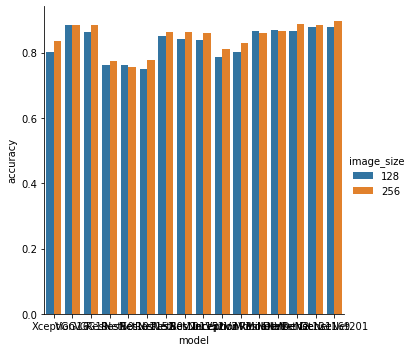

In [171]:
sns.catplot(x="model", y="accuracy", hue="image_size", kind="bar", data=df_last_layer_smote_RF)


In [142]:
def plotCategoryPlot(x, y, hue, df):
    plt.figure(figsize=(10,10))
    sns.catplot(x=x, y=y, hue=hue, kind="bar", data=df)
    plt.show()

<Figure size 720x720 with 0 Axes>

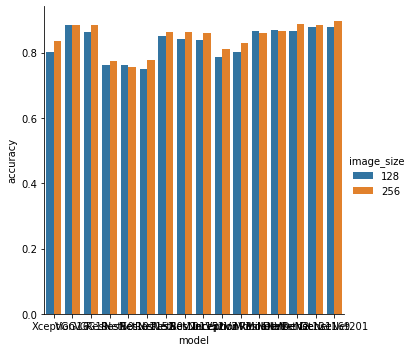

In [143]:
plotCategoryPlot("model", "accuracy", "image_size", df_last_layer_smote_RF)

In [145]:
df = df_last_layer_smote

In [152]:
df

,classifier,model,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
0,RF,Xception,128,0.802,0.810,0.802,0.802,0.644,0.659,0.644,0.651,0.979,0.978,0.021,0.356,0.341,0.974
1,RF,VGG16,128,0.885,0.887,0.885,0.880,0.721,0.840,0.721,0.776,0.985,0.989,0.015,0.279,0.160,0.985
2,RF,VGG19,128,0.862,0.862,0.862,0.858,0.725,0.798,0.725,0.760,0.983,0.986,0.017,0.275,0.202,0.982
3,RF,ResNet50,128,0.761,0.802,0.761,0.772,0.665,0.652,0.665,0.658,0.976,0.973,0.024,0.335,0.348,0.968
4,RF,ResNet101,128,0.762,0.790,0.762,0.769,0.641,0.666,0.641,0.653,0.976,0.973,0.024,0.359,0.334,0.968
5,RF,ResNet152,128,0.751,0.780,0.751,0.759,0.612,0.600,0.612,0.606,0.975,0.972,0.025,0.388,0.400,0.967
6,RF,ResNet50V2,128,0.851,0.853,0.851,0.842,0.664,0.849,0.664,0.745,0.979,0.986,0.021,0.336,0.151,0.980
7,RF,ResNet101V2,128,0.841,0.847,0.841,0.835,0.647,0.844,0.647,0.732,0.978,0.984,0.022,0.353,0.156,0.979
8,RF,ResNet152V2,128,0.838,0.845,0.838,0.831,0.635,0.821,0.635,0.716,0.978,0.984,0.022,0.365,0.179,0.978
9,RF,InceptionV3,128,0.788,0.799,0.788,0.787,0.657,0.675,0.657,0.666,0.976,0.976,0.024,0.343,0.325,0.972


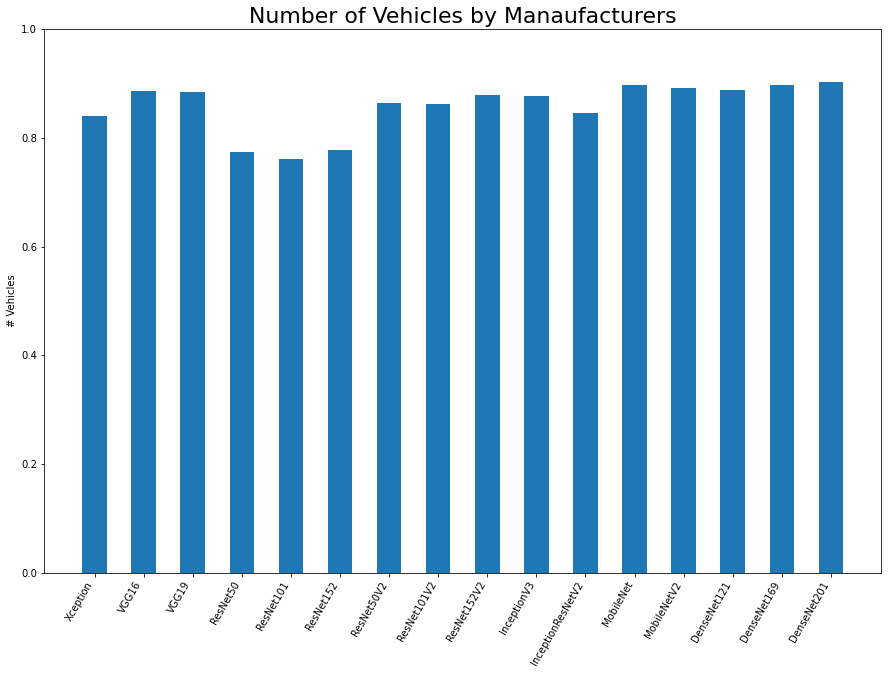

In [169]:
# Plot Bars
plt.figure(figsize=(15,10))
plt.bar(df['model'], df['recall'],  width=.5)

# Decoration
plt.gca().set_xticklabels(df['model'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 1)
plt.show()

# df_last_layer_RF

In [79]:
df_last_layer_RF=df_last_layer[df_last_layer.classifier=="RF"]

NameError: name 'df_last_layer' is not defined

# df_last_layer_RF_128

In [42]:
df_last_layer_RF_128=df_last_layer_RF[df_last_layer_RF.image_size==128]
df_last_layer_RF_128.to_csv(output_folder+"last_layer_RF_128.csv", header=True, index=False)
df_last_layer_RF_128.max()

classifier          RF
model         Xception
accuracy         0.885
precision        0.887
recall           0.885
f1_score          0.88
image_size         128
dtype: object

In [33]:
print(df_last_layer_RF_128[df_last_layer_RF_128["accuracy"]==df_last_layer_RF_128["accuracy"].max()])
print(df_last_layer_RF_128[df_last_layer_RF_128["precision"]==df_last_layer_RF_128["precision"].max()])
print(df_last_layer_RF_128[df_last_layer_RF_128["recall"]==df_last_layer_RF_128["recall"].max()])
print(df_last_layer_RF_128[df_last_layer_RF_128["f1_score"]==df_last_layer_RF_128["f1_score"].max()])

  classifier  model  accuracy  precision  recall  f1_score  image_size
1         RF  VGG16     0.885      0.887   0.885      0.88         128
  classifier  model  accuracy  precision  recall  f1_score  image_size
1         RF  VGG16     0.885      0.887   0.885      0.88         128
  classifier  model  accuracy  precision  recall  f1_score  image_size
1         RF  VGG16     0.885      0.887   0.885      0.88         128
  classifier  model  accuracy  precision  recall  f1_score  image_size
1         RF  VGG16     0.885      0.887   0.885      0.88         128


# df_last_layer_RF_256

In [39]:
df_last_layer_RF_256=df_last_layer_RF[df_last_layer_RF.image_size==256]
df_last_layer_RF_256.to_csv(output_folder+"last_layer_RF_256.csv", header=True, index=False)
df_last_layer_RF_256.max()

classifier          RF
model         Xception
accuracy         0.897
precision        0.897
recall           0.897
f1_score          0.89
image_size         256
dtype: object

In [40]:
print(df_last_layer_RF_256[df_last_layer_RF_256["accuracy"]==df_last_layer_RF_256["accuracy"].max()])
print(df_last_layer_RF_256[df_last_layer_RF_256["precision"]==df_last_layer_RF_256["precision"].max()])
print(df_last_layer_RF_256[df_last_layer_RF_256["recall"]==df_last_layer_RF_256["recall"].max()])
print(df_last_layer_RF_256[df_last_layer_RF_256["f1_score"]==df_last_layer_RF_256["f1_score"].max()])

   classifier        model  accuracy  precision  recall  f1_score  image_size
48         RF  DenseNet201     0.897      0.897   0.897      0.89         256
   classifier        model  accuracy  precision  recall  f1_score  image_size
48         RF  DenseNet201     0.897      0.897   0.897      0.89         256
   classifier        model  accuracy  precision  recall  f1_score  image_size
48         RF  DenseNet201     0.897      0.897   0.897      0.89         256
   classifier        model  accuracy  precision  recall  f1_score  image_size
48         RF  DenseNet201     0.897      0.897   0.897      0.89         256


# df_last_layer_SVM

In [43]:
df_last_layer_SVM=df_last_layer[df_last_layer.classifier=="SVM"]

# df_last_layer_SVM_128

In [45]:
df_last_layer_SVM_128=df_last_layer_SVM[df_last_layer_SVM.image_size==128]
df_last_layer_SVM_128.to_csv(output_folder+"last_layer_SVM_128.csv", header=True, index=False)
df_last_layer_SVM_128.max()

classifier         SVM
model         Xception
accuracy         0.882
precision        0.887
recall           0.882
f1_score         0.881
image_size         128
dtype: object

In [46]:
print(df_last_layer_SVM_128[df_last_layer_SVM_128["accuracy"]==df_last_layer_SVM_128["accuracy"].max()])
print(df_last_layer_SVM_128[df_last_layer_SVM_128["precision"]==df_last_layer_SVM_128["precision"].max()])
print(df_last_layer_SVM_128[df_last_layer_SVM_128["recall"]==df_last_layer_SVM_128["recall"].max()])
print(df_last_layer_SVM_128[df_last_layer_SVM_128["f1_score"]==df_last_layer_SVM_128["f1_score"].max()])

   classifier        model  accuracy  precision  recall  f1_score  image_size
28        SVM  MobileNetV2     0.882      0.887   0.882     0.881         128
   classifier        model  accuracy  precision  recall  f1_score  image_size
28        SVM  MobileNetV2     0.882      0.887   0.882     0.881         128
   classifier        model  accuracy  precision  recall  f1_score  image_size
28        SVM  MobileNetV2     0.882      0.887   0.882     0.881         128
   classifier        model  accuracy  precision  recall  f1_score  image_size
28        SVM  MobileNetV2     0.882      0.887   0.882     0.881         128


# df_last_layer_SVM_256

In [47]:
df_last_layer_SVM_256=df_last_layer_SVM[df_last_layer_SVM.image_size==256]
df_last_layer_SVM_256.to_csv(output_folder+"last_layer_SVM_256.csv", header=True, index=False)
df_last_layer_SVM_256.max()

classifier   NaN
model        NaN
accuracy     NaN
precision    NaN
recall       NaN
f1_score     NaN
image_size   NaN
dtype: float64

In [48]:
print(df_last_layer_SVM_256[df_last_layer_SVM_256["accuracy"]==df_last_layer_SVM_256["accuracy"].max()])
print(df_last_layer_SVM_256[df_last_layer_SVM_256["precision"]==df_last_layer_SVM_256["precision"].max()])
print(df_last_layer_SVM_256[df_last_layer_SVM_256["recall"]==df_last_layer_SVM_256["recall"].max()])
print(df_last_layer_SVM_256[df_last_layer_SVM_256["f1_score"]==df_last_layer_SVM_256["f1_score"].max()])

Empty DataFrame
Columns: [classifier, model, accuracy, precision, recall, f1_score, image_size]
Index: []
Empty DataFrame
Columns: [classifier, model, accuracy, precision, recall, f1_score, image_size]
Index: []
Empty DataFrame
Columns: [classifier, model, accuracy, precision, recall, f1_score, image_size]
Index: []
Empty DataFrame
Columns: [classifier, model, accuracy, precision, recall, f1_score, image_size]
Index: []


# df_pca_last_layer

In [50]:
df_pca_last_layer = pd_read_pattern('../classifier/output/pca*.csv')
print(df_pca_last_layer.shape)
df_pca_last_layer.head()

(160, 8)


,classifier,model,pca_n,accuracy,precision,recall,f1_score,image_size
0,RF,Xception,50,0.817,0.833,0.817,0.820,256
1,RF,Xception,100,0.842,0.846,0.842,0.839,256
2,RF,Xception,500,0.830,0.832,0.830,0.824,256
3,RF,Xception,1000,0.808,0.833,0.808,0.790,256
4,RF,Xception,1500,0.141,0.958,0.141,0.188,256


In [51]:
df_pca_last_layer.describe()

,pca_n,accuracy,precision,recall,f1_score,image_size
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,630.000000,0.773756,0.834887,0.773756,0.775325,192.000000
std,554.546673,0.143115,0.035704,0.143115,0.126297,64.200942
min,50.000000,0.140000,0.756000,0.140000,0.188000,128.000000
25%,100.000000,0.774250,0.810750,0.774250,0.768000,128.000000
50%,500.000000,0.808000,0.833000,0.808000,0.806000,192.000000
75%,1000.000000,0.843500,0.857000,0.843500,0.841250,256.000000
max,1500.000000,0.883000,0.966000,0.883000,0.880000,256.000000


In [53]:
df_pca_last_layer.classifier.value_counts()

RF    160
Name: classifier, dtype: int64

In [54]:
df_pca_last_layer.image_size.value_counts()

128    80
256    80
Name: image_size, dtype: int64

# df_pca_last_layer_RF

In [55]:
df_pca_last_layer_RF=df_pca_last_layer[df_pca_last_layer.classifier=="RF"]

# df_pca_last_layer_RF_128

In [56]:
df_pca_last_layer_RF_128=df_pca_last_layer_RF[df_pca_last_layer_RF.image_size==128]
df_pca_last_layer_RF_128.to_csv(output_folder+"pca_last_layer_RF_128.csv", header=True, index=False)
df_pca_last_layer_RF_128.max()

classifier          RF
model         Xception
pca_n             1500
accuracy         0.877
precision        0.879
recall           0.877
f1_score         0.874
image_size         128
dtype: object

In [57]:
print(df_pca_last_layer_RF_128[df_pca_last_layer_RF_128["accuracy"]==df_pca_last_layer_RF_128["accuracy"].max()])
print(df_pca_last_layer_RF_128[df_pca_last_layer_RF_128["precision"]==df_pca_last_layer_RF_128["precision"].max()])
print(df_pca_last_layer_RF_128[df_pca_last_layer_RF_128["recall"]==df_pca_last_layer_RF_128["recall"].max()])
print(df_pca_last_layer_RF_128[df_pca_last_layer_RF_128["f1_score"]==df_pca_last_layer_RF_128["f1_score"].max()])

    classifier      model  pca_n  accuracy  precision  recall  f1_score  \
136         RF  MobileNet    100     0.877      0.879   0.877     0.874   

     image_size  
136         128  
    classifier      model  pca_n  accuracy  precision  recall  f1_score  \
136         RF  MobileNet    100     0.877      0.879   0.877     0.874   

     image_size  
136         128  
    classifier      model  pca_n  accuracy  precision  recall  f1_score  \
136         RF  MobileNet    100     0.877      0.879   0.877     0.874   

     image_size  
136         128  
    classifier      model  pca_n  accuracy  precision  recall  f1_score  \
136         RF  MobileNet    100     0.877      0.879   0.877     0.874   

     image_size  
136         128  


# df_pca_last_layer_RF_256

In [58]:
df_pca_last_layer_RF_256=df_pca_last_layer_RF[df_pca_last_layer_RF.image_size==256]
df_pca_last_layer_RF_256.to_csv(output_folder+"pca_last_layer_RF_256.csv", header=True, index=False)
df_pca_last_layer_RF_256.max()

classifier          RF
model         Xception
pca_n             1500
accuracy         0.883
precision        0.966
recall           0.883
f1_score          0.88
image_size         256
dtype: object

In [59]:
print(df_pca_last_layer_RF_256[df_pca_last_layer_RF_256["accuracy"]==df_pca_last_layer_RF_256["accuracy"].max()])
print(df_pca_last_layer_RF_256[df_pca_last_layer_RF_256["precision"]==df_pca_last_layer_RF_256["precision"].max()])
print(df_pca_last_layer_RF_256[df_pca_last_layer_RF_256["recall"]==df_pca_last_layer_RF_256["recall"].max()])
print(df_pca_last_layer_RF_256[df_pca_last_layer_RF_256["f1_score"]==df_pca_last_layer_RF_256["f1_score"].max()])

   classifier        model  pca_n  accuracy  precision  recall  f1_score  \
71         RF  DenseNet169    100     0.883      0.883   0.883      0.88   

    image_size  
71         256  
   classifier        model  pca_n  accuracy  precision  recall  f1_score  \
44         RF  ResNet152V2   1500      0.14      0.966    0.14      0.19   

    image_size  
44         256  
   classifier        model  pca_n  accuracy  precision  recall  f1_score  \
71         RF  DenseNet169    100     0.883      0.883   0.883      0.88   

    image_size  
71         256  
   classifier        model  pca_n  accuracy  precision  recall  f1_score  \
71         RF  DenseNet169    100     0.883      0.883   0.883      0.88   

    image_size  
71         256  


In [30]:
df_intermediate_layer = pd_read_pattern('classifier/output/intermediate_layer*.csv')
print(df_intermediate_layer.shape)
df_intermediate_layer.head()

(3, 7)


,classifier,model,accuracy,precision,recall,f1_score,image_size
0,RF,VGG16,0.864,0.869,0.864,0.862,128
1,RF,VGG16,0.891,0.895,0.891,0.886,128
2,RF,VGG16,0.885,0.888,0.885,0.876,256


In [34]:
df_intermediate_layer.describe()

,accuracy,precision,recall,f1_score,image_size
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.880000,0.884000,0.880000,0.874667,170.666667
std,0.014177,0.013454,0.014177,0.012055,73.900834
min,0.864000,0.869000,0.864000,0.862000,128.000000
25%,0.874500,0.878500,0.874500,0.869000,128.000000
50%,0.885000,0.888000,0.885000,0.876000,128.000000
75%,0.888000,0.891500,0.888000,0.881000,192.000000
max,0.891000,0.895000,0.891000,0.886000,256.000000


# last_layer_smote_fusion

In [187]:
df_last_layer_smote_fusion_2_RF=pd.read_csv(analysis_data_folder + "last_layer_smote_fusion_2_RF_128_256.csv")

In [188]:
df_last_layer_smote_fusion_2_RF.describe()

,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,192.000000,0.854350,0.862242,0.854350,0.852588,0.719333,0.801479,0.719333,0.757313,0.982650,0.984613,0.017350,0.280667,0.198521,0.980592
std,64.133751,0.032185,0.022831,0.032185,0.028498,0.032332,0.063257,0.032332,0.041911,0.002271,0.004194,0.002271,0.032332,0.063257,0.004306
min,128.000000,0.718000,0.786000,0.718000,0.738000,0.635000,0.581000,0.635000,0.611000,0.976000,0.969000,0.014000,0.212000,0.099000,0.962000
25%,128.000000,0.842750,0.852750,0.842750,0.841000,0.694000,0.782500,0.694000,0.741000,0.981000,0.983000,0.016000,0.256000,0.157750,0.979000
50%,192.000000,0.863000,0.868000,0.863000,0.859500,0.724000,0.813000,0.724000,0.764000,0.983000,0.986000,0.017000,0.276000,0.187000,0.982000
75%,256.000000,0.876250,0.878250,0.876250,0.872250,0.744000,0.842250,0.744000,0.787000,0.984000,0.988000,0.019000,0.306000,0.217500,0.983250
max,256.000000,0.895000,0.894000,0.895000,0.891000,0.788000,0.901000,0.788000,0.824000,0.986000,0.990000,0.024000,0.365000,0.419000,0.986000


In [189]:
df_last_layer_smote_fusion_2_RF.head()

,classifier,model1,model2,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
0,RF,Xception,VGG16,128,0.838,0.852,0.838,0.841,0.752,0.727,0.752,0.739,0.984,0.982,0.016,0.248,0.273,0.978
1,RF,Xception,VGG19,128,0.826,0.842,0.826,0.829,0.746,0.728,0.746,0.737,0.983,0.980,0.017,0.254,0.272,0.977
2,RF,Xception,ResNet50,128,0.793,0.813,0.793,0.797,0.659,0.648,0.659,0.653,0.979,0.977,0.021,0.341,0.352,0.972
3,RF,Xception,ResNet101,128,0.797,0.815,0.797,0.800,0.669,0.674,0.669,0.671,0.979,0.977,0.021,0.331,0.326,0.973
4,RF,Xception,ResNet152,128,0.806,0.817,0.806,0.807,0.659,0.675,0.659,0.667,0.979,0.979,0.021,0.341,0.325,0.974


In [191]:
df_last_layer_smote_fusion_2_RF.model1.value_counts()

Xception             30
VGG16                28
VGG19                26
ResNet50             24
ResNet101            22
ResNet152            20
ResNet50V2           18
ResNet101V2          16
ResNet152V2          14
InceptionV3          12
InceptionResNetV2    10
MobileNet            8 
MobileNetV2          6 
DenseNet121          4 
DenseNet169          2 
Name: model1, dtype: int64

In [204]:
df_last_layer_smote_fusion_2_RF["valid"]=df_last_layer_smote_fusion_2_RF["model1"].apply(lambda x : 0 if x=="ResNet50" else 1)
df_last_layer_smote_fusion_2_RF_1=df_last_layer_smote_fusion_2_RF[df_last_layer_smote_fusion_2_RF.valid==1]
df_last_layer_smote_fusion_2_RF_1["valid"]=df_last_layer_smote_fusion_2_RF_1["model1"].apply(lambda x : 0 if x=="ResNet101" else 1)
df_last_layer_smote_fusion_2_RF_2=df_last_layer_smote_fusion_2_RF_1[df_last_layer_smote_fusion_2_RF_1.valid==1]
df_last_layer_smote_fusion_2_RF_2["valid"]=df_last_layer_smote_fusion_2_RF_2["model1"].apply(lambda x : 0 if x=="ResNet152" else 1)
df_last_layer_smote_fusion_2_RF_3=df_last_layer_smote_fusion_2_RF_2[df_last_layer_smote_fusion_2_RF_2.valid==1]



<ipython-input-204-6a1437f127e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_layer_smote_fusion_2_RF_1["valid"]=df_last_layer_smote_fusion_2_RF_1["model1"].apply(lambda x : 0 if x=="ResNet101" else 1)
<ipython-input-204-6a1437f127e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_layer_smote_fusion_2_RF_2["valid"]=df_last_layer_smote_fusion_2_RF_2["model1"].apply(lambda x : 0 if x=="ResNet152" else 1)


In [205]:
df_last_layer_smote_fusion_2_RF_3[df_last_layer_smote_fusion_2_RF_3.valid==1]

,classifier,model1,model2,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc,valid
0,RF,Xception,VGG16,128,0.838,0.852,0.838,0.841,0.752,0.727,0.752,0.739,0.984,0.982,0.016,0.248,0.273,0.978,1
1,RF,Xception,VGG19,128,0.826,0.842,0.826,0.829,0.746,0.728,0.746,0.737,0.983,0.980,0.017,0.254,0.272,0.977,1
2,RF,Xception,ResNet50,128,0.793,0.813,0.793,0.797,0.659,0.648,0.659,0.653,0.979,0.977,0.021,0.341,0.352,0.972,1
3,RF,Xception,ResNet101,128,0.797,0.815,0.797,0.800,0.669,0.674,0.669,0.671,0.979,0.977,0.021,0.331,0.326,0.973,1
4,RF,Xception,ResNet152,128,0.806,0.817,0.806,0.807,0.659,0.675,0.659,0.667,0.979,0.979,0.021,0.341,0.325,0.974,1
5,RF,Xception,ResNet50V2,128,0.820,0.837,0.820,0.823,0.716,0.739,0.716,0.727,0.981,0.980,0.019,0.284,0.261,0.976,1
6,RF,Xception,ResNet101V2,128,0.800,0.821,0.800,0.804,0.693,0.673,0.693,0.683,0.980,0.977,0.020,0.307,0.327,0.973,1
7,RF,Xception,ResNet152V2,128,0.810,0.823,0.810,0.812,0.677,0.680,0.677,0.678,0.981,0.979,0.019,0.323,0.320,0.975,1
8,RF,Xception,InceptionV3,128,0.797,0.816,0.797,0.800,0.674,0.669,0.674,0.671,0.980,0.977,0.020,0.326,0.331,0.973,1
9,RF,Xception,InceptionResNetV2,128,0.799,0.816,0.799,0.802,0.665,0.647,0.665,0.656,0.979,0.978,0.021,0.335,0.353,0.973,1


In [206]:
df_last_layer_smote_fusion_2_RF_3["valid"]=df_last_layer_smote_fusion_2_RF_3["model2"].apply(lambda x : 0 if x=="ResNet50" else 1)
df_last_layer_smote_fusion_2_RF_4=df_last_layer_smote_fusion_2_RF_3[df_last_layer_smote_fusion_2_RF_3.valid==1]
df_last_layer_smote_fusion_2_RF_4["valid"]=df_last_layer_smote_fusion_2_RF_4["model2"].apply(lambda x : 0 if x=="ResNet101" else 1)
df_last_layer_smote_fusion_2_RF_5=df_last_layer_smote_fusion_2_RF_4[df_last_layer_smote_fusion_2_RF_4.valid==1]
df_last_layer_smote_fusion_2_RF_5["valid"]=df_last_layer_smote_fusion_2_RF_5["model2"].apply(lambda x : 0 if x=="ResNet152" else 1)
df_last_layer_smote_fusion_2_RF_6=df_last_layer_smote_fusion_2_RF_5[df_last_layer_smote_fusion_2_RF_5.valid==1]



<ipython-input-206-a9dba51d32c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_layer_smote_fusion_2_RF_3["valid"]=df_last_layer_smote_fusion_2_RF_3["model2"].apply(lambda x : 0 if x=="ResNet50" else 1)
<ipython-input-206-a9dba51d32c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_layer_smote_fusion_2_RF_4["valid"]=df_last_layer_smote_fusion_2_RF_4["model2"].apply(lambda x : 0 if x=="ResNet101" else 1)
<ipython-input-206-a9dba51d32c6>:5: SettingWithCopyWarning: 
A value is trying to be 

In [207]:
df_last_layer_smote_fusion_2_RF_6

,classifier,model1,model2,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc,valid
0,RF,Xception,VGG16,128,0.838,0.852,0.838,0.841,0.752,0.727,0.752,0.739,0.984,0.982,0.016,0.248,0.273,0.978,1
1,RF,Xception,VGG19,128,0.826,0.842,0.826,0.829,0.746,0.728,0.746,0.737,0.983,0.980,0.017,0.254,0.272,0.977,1
5,RF,Xception,ResNet50V2,128,0.820,0.837,0.820,0.823,0.716,0.739,0.716,0.727,0.981,0.980,0.019,0.284,0.261,0.976,1
6,RF,Xception,ResNet101V2,128,0.800,0.821,0.800,0.804,0.693,0.673,0.693,0.683,0.980,0.977,0.020,0.307,0.327,0.973,1
7,RF,Xception,ResNet152V2,128,0.810,0.823,0.810,0.812,0.677,0.680,0.677,0.678,0.981,0.979,0.019,0.323,0.320,0.975,1
8,RF,Xception,InceptionV3,128,0.797,0.816,0.797,0.800,0.674,0.669,0.674,0.671,0.980,0.977,0.020,0.326,0.331,0.973,1
9,RF,Xception,InceptionResNetV2,128,0.799,0.816,0.799,0.802,0.665,0.647,0.665,0.656,0.979,0.978,0.021,0.335,0.353,0.973,1
10,RF,Xception,MobileNet,128,0.802,0.820,0.802,0.806,0.684,0.667,0.684,0.675,0.980,0.978,0.020,0.316,0.333,0.974,1
11,RF,Xception,MobileNetV2,128,0.814,0.825,0.814,0.816,0.693,0.710,0.693,0.701,0.980,0.979,0.020,0.307,0.290,0.975,1
12,RF,Xception,DenseNet121,128,0.855,0.863,0.855,0.854,0.747,0.775,0.747,0.761,0.984,0.984,0.016,0.253,0.225,0.981,1


In [210]:
df_last_layer_smote_fusion_2_RF_6.describe()

,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc,valid
count,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,192.00000,0.863276,0.868487,0.863276,0.860551,0.728026,0.817064,0.728026,0.769301,0.983250,0.985718,0.016750,0.271974,0.182936,0.981795,1.0
std,64.20612,0.022604,0.018160,0.022604,0.020896,0.029346,0.049207,0.029346,0.032443,0.001936,0.003119,0.001936,0.029346,0.049207,0.003024,0.0
min,128.00000,0.795000,0.814000,0.795000,0.799000,0.665000,0.647000,0.665000,0.656000,0.977000,0.977000,0.014000,0.212000,0.099000,0.973000,1.0
25%,128.00000,0.851000,0.860000,0.851000,0.849750,0.698750,0.794000,0.698750,0.753750,0.982000,0.984000,0.015000,0.247000,0.150250,0.980000,1.0
50%,192.00000,0.868500,0.872000,0.868500,0.865000,0.735000,0.822000,0.735000,0.775000,0.984000,0.986000,0.016000,0.265000,0.178000,0.982000,1.0
75%,256.00000,0.880000,0.881250,0.880000,0.877000,0.753000,0.849750,0.753000,0.790000,0.985000,0.988000,0.018000,0.301250,0.206000,0.984000,1.0
max,256.00000,0.895000,0.894000,0.895000,0.891000,0.788000,0.901000,0.788000,0.824000,0.986000,0.990000,0.023000,0.335000,0.353000,0.986000,1.0


In [218]:
df_last_layer_smote_fusion_2_RF_6_sorted=df_last_layer_smote_fusion_2_RF_6.sort_values(by=["recall", "f1_score"], ascending=False)

In [219]:
df_last_layer_smote_fusion_2_RF_6_sorted.to_csv("output/df_last_layer_smote_fusion_2_RF_6_sorted.csv", header=True, index=False)

# df_last_layer_smote_fusion_3_RF

In [220]:
df_last_layer_smote_fusion_3_RF=pd.read_csv(analysis_data_folder + "last_layer_smote_fusion_3_RF_128_256.csv")

In [221]:
df_last_layer_smote_fusion_3_RF.describe()

,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,192.000000,0.871837,0.876479,0.871837,0.869917,0.749850,0.818029,0.749850,0.781971,0.984842,0.986288,0.015158,0.250150,0.181971,0.982892
std,64.133751,0.012892,0.009297,0.012892,0.011454,0.018383,0.033024,0.018383,0.018538,0.001075,0.001972,0.001075,0.018383,0.033024,0.001742
min,128.000000,0.830000,0.852000,0.830000,0.833000,0.693000,0.744000,0.693000,0.733000,0.981000,0.981000,0.013000,0.209000,0.103000,0.977000
25%,128.000000,0.862750,0.869750,0.862750,0.862000,0.740750,0.792000,0.740750,0.770750,0.984000,0.985000,0.014000,0.238000,0.156000,0.982000
50%,192.000000,0.873000,0.878000,0.873000,0.872000,0.753000,0.818500,0.753000,0.785000,0.985000,0.986000,0.015000,0.247000,0.181500,0.983000
75%,256.000000,0.882000,0.884000,0.882000,0.879000,0.762000,0.844000,0.762000,0.796000,0.986000,0.988000,0.016000,0.259250,0.208000,0.984000
max,256.000000,0.897000,0.895000,0.897000,0.893000,0.791000,0.897000,0.791000,0.818000,0.987000,0.991000,0.019000,0.307000,0.256000,0.986000


In [222]:
df_last_layer_smote_fusion_3_RF.model1.value_counts()

VGG16          72
VGG19          56
ResNet101V2    42
ResNet152V2    30
InceptionV3    20
MobileNet      12
MobileNetV2    6 
DenseNet121    2 
Name: model1, dtype: int64

In [223]:
df_last_layer_smote_fusion_3_RF_sorted=df_last_layer_smote_fusion_3_RF.sort_values(by=["recall", "f1_score"], ascending=False)
df_last_layer_smote_fusion_3_RF_sorted.to_csv("output/df_last_layer_smote_fusion_3_RF_sorted.csv", header=True, index=False)



# PCA

# last_layer_smote_pca_classifier_RF_128_256

In [224]:
last_layer_smote_pca_classifier_RF_128_256=pd.read_csv(analysis_data_folder + "last_layer_smote_pca_classifier_RF_128_256.csv")



In [225]:
last_layer_smote_pca_classifier_RF_128_256.describe()

,image_size,n_components,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,192.000000,630.000000,0.773756,0.834887,0.773756,0.775325,0.625813,0.765169,0.625813,0.676562,0.974275,0.977275,0.025725,0.374188,0.234831,0.969856
std,64.200942,554.546673,0.143115,0.035704,0.143115,0.126297,0.121315,0.085836,0.121315,0.078513,0.010921,0.010364,0.010921,0.121315,0.085836,0.019117
min,128.000000,50.000000,0.140000,0.756000,0.140000,0.188000,0.382000,0.543000,0.382000,0.486000,0.942000,0.942000,0.014000,0.221000,0.042000,0.885000
25%,128.000000,100.000000,0.774250,0.810750,0.774250,0.768000,0.557000,0.715250,0.557000,0.630250,0.969750,0.975000,0.018000,0.285000,0.179750,0.970000
50%,192.000000,500.000000,0.808000,0.833000,0.808000,0.806000,0.664500,0.772500,0.664500,0.692000,0.978000,0.980500,0.022000,0.335500,0.227500,0.974000
75%,256.000000,1000.000000,0.843500,0.857000,0.843500,0.841250,0.715000,0.820250,0.715000,0.743000,0.982000,0.983000,0.030250,0.443000,0.284750,0.979000
max,256.000000,1500.000000,0.883000,0.966000,0.883000,0.880000,0.779000,0.958000,0.779000,0.804000,0.986000,0.989000,0.058000,0.618000,0.457000,0.984000


In [229]:
last_layer_smote_pca_classifier_RF_128_256_sorted=last_layer_smote_pca_classifier_RF_128_256.sort_values(by=["recall", "f1_score"], ascending=False)
last_layer_smote_pca_classifier_RF_128_256_sorted.to_csv("output/last_layer_smote_pca_classifier_RF_128_256_sorted.csv", header=True, index=False)



# last_layer_smote_pca_classifier_SVM_128_256

In [230]:
last_layer_smote_pca_classifier_SVM_128_256=pd.read_csv(analysis_data_folder + "last_layer_smote_pca_classifier_SVM_128_256.csv")
last_layer_smote_pca_classifier_SVM_128_256.describe()


,image_size,n_components,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,192.000000,216.666667,0.788917,0.828792,0.788917,0.798979,0.739313,0.677542,0.739313,0.704438,0.980146,0.976000,0.019854,0.260688,0.322458,0.971833
std,64.677268,203.515208,0.065385,0.035125,0.065385,0.056196,0.039222,0.107232,0.039222,0.071870,0.003787,0.007125,0.003787,0.039222,0.107232,0.008714
min,128.000000,50.000000,0.643000,0.760000,0.643000,0.673000,0.629000,0.464000,0.629000,0.534000,0.971000,0.963000,0.013000,0.186000,0.098000,0.952000
25%,128.000000,50.000000,0.745500,0.805750,0.745500,0.762750,0.721500,0.594500,0.721500,0.654750,0.978000,0.971000,0.017000,0.233250,0.271500,0.966000
50%,192.000000,100.000000,0.785000,0.824000,0.785000,0.796500,0.742500,0.667500,0.742500,0.704000,0.980000,0.975000,0.020000,0.257500,0.332500,0.971500
75%,256.000000,500.000000,0.833500,0.846750,0.833500,0.835500,0.766750,0.728500,0.766750,0.748000,0.983000,0.980250,0.022000,0.278500,0.405500,0.978000
max,256.000000,500.000000,0.897000,0.899000,0.897000,0.896000,0.814000,0.902000,0.814000,0.843000,0.987000,0.990000,0.029000,0.371000,0.536000,0.986000


In [231]:
last_layer_smote_pca_classifier_SVM_128_256_sorted=last_layer_smote_pca_classifier_SVM_128_256.sort_values(by=["recall", "f1_score"], ascending=False)
last_layer_smote_pca_classifier_SVM_128_256_sorted.to_csv("output/last_layer_smote_pca_classifier_SVM_128_256_sorted.csv", header=True, index=False)



# last_layer_smote_pca_fusion_2_axis1_RF_128_256

In [243]:
last_layer_smote_pca_fusion_2_axis1_RF_128_256=pd.read_csv(analysis_data_folder + "last_layer_smote_pca_fusion_2_axis1_RF_128_256.csv")
last_layer_smote_pca_fusion_2_axis1_RF_128_256.describe()


,image_size,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,192.000000,0.836139,0.856053,0.836139,0.840230,0.746997,0.735240,0.746997,0.740619,0.983985,0.981293,0.016015,0.253003,0.264760,0.978126
std,64.080961,0.024243,0.016177,0.024243,0.021473,0.023435,0.040875,0.023435,0.028854,0.001881,0.002992,0.001881,0.023435,0.040875,0.003229
min,128.000000,0.736000,0.783000,0.736000,0.748000,0.648000,0.606000,0.648000,0.634000,0.975000,0.970000,0.012000,0.205000,0.170000,0.965000
25%,128.000000,0.823000,0.849000,0.823000,0.829000,0.734000,0.710000,0.734000,0.725750,0.983000,0.980000,0.015000,0.236000,0.239000,0.976000
50%,192.000000,0.838000,0.857000,0.838000,0.841000,0.749000,0.737000,0.749000,0.743000,0.984000,0.981000,0.016000,0.251000,0.263000,0.978000
75%,256.000000,0.854000,0.868000,0.854000,0.856000,0.764000,0.761000,0.764000,0.760250,0.985000,0.983000,0.017000,0.266000,0.290000,0.981000
max,256.000000,0.884000,0.888000,0.884000,0.882000,0.795000,0.830000,0.795000,0.800000,0.988000,0.988000,0.025000,0.352000,0.394000,0.984000


In [244]:
last_layer_smote_pca_fusion_2_axis1_RF_128_256.columns

Index(['classifier', 'model1', 'model2', 'image_size', 'n_components',
       'accuracy', 'precision', 'recall', 'f1_score', 'balanced_accuracy',
       'balanced_precision_PPV', 'balanced_recall_TPR', 'Bal_F1', 'TNR', 'NPV',
       'FPR', 'FNR', 'FDR', 'Overall_Acc'],
      dtype='object')

In [245]:
last_layer_smote_pca_fusion_2_axis1_RF_128_256_sorted=last_layer_smote_pca_fusion_2_axis1_RF_128_256.sort_values(by=["recall", "f1_score"], ascending=False)
last_layer_smote_pca_fusion_2_axis1_RF_128_256_sorted.to_csv("output/last_layer_smote_pca_fusion_2_axis1_RF_128_256_sorted.csv", header=True, index=False)



# last_layer_smote_pca_fusion_3_axis1_RF_128_256

In [8]:
last_layer_smote_pca_fusion_3_axis1_RF_128_256=pd.read_csv(analysis_data_folder + "last_layer_smote_pca_fusion_3_axis1_RF_128_256.csv")
last_layer_smote_pca_fusion_3_axis1_RF_128_256.describe()


,image_size,n_component,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,192.000000,216.666667,0.834214,0.859461,0.834214,0.840163,0.760233,0.726972,0.760233,0.742879,0.984801,0.980836,0.015199,0.239767,0.273028,0.977901
std,64.044491,201.524095,0.021275,0.012903,0.021275,0.018664,0.018072,0.035009,0.018072,0.023984,0.001477,0.002589,0.001477,0.018072,0.035009,0.002857
min,128.000000,50.000000,0.732000,0.794000,0.732000,0.749000,0.662000,0.610000,0.662000,0.638000,0.977000,0.970000,0.012000,0.194000,0.188000,0.964000
25%,128.000000,50.000000,0.821750,0.852000,0.821750,0.829000,0.749000,0.702000,0.749000,0.727000,0.984000,0.979000,0.014000,0.227000,0.250000,0.976000
50%,192.000000,100.000000,0.835000,0.861000,0.835000,0.842000,0.761000,0.725000,0.761000,0.743000,0.985000,0.981000,0.015000,0.239000,0.275000,0.978000
75%,256.000000,500.000000,0.850000,0.868000,0.850000,0.854000,0.773000,0.750000,0.773000,0.759000,0.986000,0.983000,0.016000,0.251000,0.298000,0.980000
max,256.000000,500.000000,0.880000,0.887000,0.880000,0.881000,0.806000,0.812000,0.806000,0.800000,0.988000,0.987000,0.023000,0.338000,0.390000,0.984000


In [9]:
last_layer_smote_pca_fusion_3_axis1_RF_128_256_sorted=last_layer_smote_pca_fusion_3_axis1_RF_128_256.sort_values(by=["recall", "f1_score"], ascending=False)



In [10]:
last_layer_smote_pca_fusion_3_axis1_RF_128_256_sorted.head()

,classifier,model1,model2,model3,image_size,n_component,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
715,RF,MobileNetV2,DenseNet169,DenseNet201,256,100,0.880,0.887,0.880,0.881,0.786,0.800,0.786,0.793,0.988,0.987,0.012,0.214,0.200,0.984
418,RF,VGG16,ResNet152V2,DenseNet169,256,100,0.878,0.883,0.878,0.877,0.769,0.787,0.769,0.778,0.988,0.987,0.012,0.231,0.213,0.984
433,RF,VGG16,InceptionV3,DenseNet169,256,100,0.877,0.886,0.877,0.877,0.775,0.788,0.775,0.781,0.987,0.987,0.013,0.225,0.212,0.984
460,RF,VGG16,DenseNet121,DenseNet169,256,100,0.875,0.882,0.875,0.875,0.788,0.794,0.788,0.791,0.987,0.986,0.013,0.212,0.206,0.983
466,RF,VGG16,DenseNet169,DenseNet201,256,100,0.874,0.882,0.874,0.875,0.786,0.782,0.786,0.784,0.987,0.985,0.013,0.214,0.218,0.983


In [11]:
last_layer_smote_pca_fusion_3_axis1_RF_128_256_sorted.to_csv("output/last_layer_smote_pca_fusion_3_axis1_RF_128_256_sorted.csv", header=True, index=False)


# last_layer_smote_pca_fusion_2_axis0_RF_128_256

In [248]:
last_layer_smote_pca_fusion_2_axis0_RF_128_256=pd.read_csv(analysis_data_folder + "last_layer_smote_pca_fusion_2_axis0_RF_128_256.csv")
last_layer_smote_pca_fusion_2_axis0_RF_128_256.describe()


,image_size,n_component,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,192.000000,216.666667,0.819636,0.831477,0.819636,0.819684,0.695174,0.723621,0.695174,0.708485,0.979838,0.979717,0.020162,0.304826,0.276379,0.975947
std,64.080961,201.638855,0.027841,0.022561,0.027841,0.025877,0.032769,0.050553,0.032769,0.036919,0.002700,0.003555,0.002700,0.032769,0.050553,0.003710
min,128.000000,50.000000,0.724000,0.742000,0.724000,0.725000,0.553000,0.587000,0.553000,0.569000,0.969000,0.968000,0.015000,0.244000,0.166000,0.963000
25%,128.000000,50.000000,0.803000,0.821000,0.803000,0.807000,0.678000,0.686750,0.678000,0.684000,0.979000,0.978000,0.018000,0.280000,0.235000,0.974000
50%,192.000000,100.000000,0.824000,0.834000,0.824000,0.823000,0.700000,0.723000,0.700000,0.713000,0.980000,0.980000,0.020000,0.300000,0.277000,0.976000
75%,256.000000,500.000000,0.839000,0.847000,0.839000,0.838000,0.720000,0.765000,0.720000,0.735250,0.982000,0.982000,0.021000,0.322000,0.313250,0.979000
max,256.000000,500.000000,0.875000,0.877000,0.875000,0.871000,0.756000,0.834000,0.756000,0.782000,0.985000,0.987000,0.031000,0.447000,0.413000,0.983000


In [249]:
last_layer_smote_pca_fusion_2_axis0_RF_128_256_sorted=last_layer_smote_pca_fusion_2_axis0_RF_128_256.sort_values(by=["recall", "f1_score"], ascending=False)
last_layer_smote_pca_fusion_2_axis0_RF_128_256_sorted.to_csv("output/last_layer_smote_pca_fusion_2_axis0_RF_128_256_sorted.csv", header=True, index=False)



# last_layer_smote_pca_fusion_3_axis0_RF_128_256

In [250]:
last_layer_smote_pca_fusion_3_axis0_RF_128_256=pd.read_csv(analysis_data_folder + "last_layer_smote_pca_fusion_3_axis0_RF_128_256.csv")
last_layer_smote_pca_fusion_3_axis0_RF_128_256.describe()


,image_size,n_component,accuracy,precision,recall,f1_score,balanced_accuracy,balanced_precision_PPV,balanced_recall_TPR,Bal_F1,TNR,NPV,FPR,FNR,FDR,Overall_Acc
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,192.000000,216.666667,0.809654,0.822369,0.809654,0.809963,0.683539,0.711744,0.683539,0.696797,0.978636,0.978492,0.021364,0.316461,0.288256,0.974618
std,64.044491,201.524095,0.033137,0.025885,0.033137,0.030618,0.036807,0.050568,0.036807,0.039851,0.003043,0.004087,0.003043,0.036807,0.050568,0.004419
min,128.000000,50.000000,0.684000,0.726000,0.684000,0.694000,0.539000,0.574000,0.539000,0.560000,0.967000,0.964000,0.016000,0.255000,0.177000,0.958000
25%,128.000000,50.000000,0.796750,0.811000,0.796750,0.797000,0.666000,0.683000,0.666000,0.678000,0.977000,0.977000,0.019000,0.291000,0.252750,0.973000
50%,192.000000,100.000000,0.815000,0.826000,0.815000,0.815000,0.692000,0.715000,0.692000,0.702000,0.979000,0.979000,0.021000,0.308000,0.285000,0.975000
75%,256.000000,500.000000,0.832000,0.840000,0.832000,0.831000,0.709000,0.747250,0.709000,0.725000,0.981000,0.981000,0.023000,0.334000,0.317000,0.978000
max,256.000000,500.000000,0.869000,0.869000,0.869000,0.864000,0.745000,0.823000,0.745000,0.777000,0.984000,0.987000,0.033000,0.461000,0.426000,0.982000


In [251]:
last_layer_smote_pca_fusion_3_axis0_RF_128_256_sorted=last_layer_smote_pca_fusion_3_axis0_RF_128_256.sort_values(by=["recall", "f1_score"], ascending=False)
last_layer_smote_pca_fusion_3_axis0_RF_128_256_sorted.to_csv("output/last_layer_smote_pca_fusion_3_axis0_RF_128_256_sorted.csv", header=True, index=False)



# Approach comparison

In [58]:
input_csv="approach_comparison.csv"

In [59]:
import pandas as pd

In [60]:
df=pd.read_csv(input_csv)

In [61]:
df_sorted=df.sort_values(by="recall", ascending=False)

In [62]:
df_sorted

,Approach,model,accuracy,precision,recall,f1,image_size,classifier
5,3,DenseNet201,0.903,0.906,0.903,0.903,256,svm
4,3,DenseNet201,0.897,0.897,0.897,0.890,256,rf
9,4,VGG19_ResNet152V2_DenseNet201,0.897,0.895,0.897,0.893,256,rf
13,5,DenseNet201_500,0.897,0.899,0.897,0.896,256,svm
7,4,Xception_DenseNet201,0.895,0.894,0.895,0.891,256,rf
3,3,MobileNet,0.891,0.894,0.891,0.890,128,svm
8,4,ResNet101V2_MobileNetV2_DenseNet201,0.890,0.891,0.890,0.888,128,rf
2,3,VGG16,0.885,0.887,0.885,0.880,128,rf
11,5,MobileNet_500,0.884,0.884,0.884,0.880,128,svm
6,4,VGG19_DenseNet169,0.884,0.888,0.884,0.883,128,rf


In [32]:
df_sorted.to_csv("approach_analysis.csv", header=True, index=False)

In [93]:
input_csv="approach_analysis_for_graph.csv"
import pandas as pd
df=pd.read_csv(input_csv)
df

,Approach,model,accuracy,precision,recall,f1,image_size,classifier
0,Approach 8,DenseNet201_512,0.908,0.909,0.908,0.906,512.0,SVM
1,Approach 3,DenseNet201_256,0.903,0.906,0.903,0.903,256.0,SVM
2,Approach 4,VGG19_ResNet152V2_DenseNet201,0.897,0.895,0.897,0.893,256.0,RF
3,Approach 5,DenseNet201_500,0.897,0.899,0.897,0.896,256.0,SVM
4,Approach 6,MobileNetV2_DenseNet169_DenseNet201_100,0.880,0.887,0.880,0.881,256.0,RF
5,Approach 7,VGG16_DenseNet169_100,0.875,0.877,0.875,0.871,256.0,RF
6,Approach 2,DenseNet169,0.880,0.901,0.869,0.884,256.0,NN
7,SOTA,SOTA,NaN,NaN,0.906,0.905,NaN,NaN


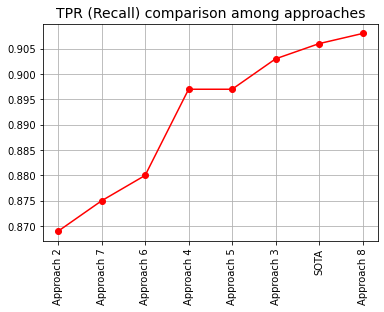

In [98]:
df_recall=df.sort_values(by="recall")
import matplotlib.pyplot as plt
   
recall = df_recall.recall
approach  = df_recall.Approach
  
plt.plot(approach, recall, color='red', marker='o')
plt.title('TPR (Recall) comparison among approaches', fontsize=14)
#plt.xlabel('models', fontsize=14)
#plt.ylabel('recall', fontsize=14)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

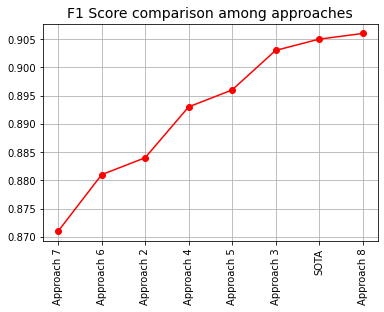

In [99]:
df_f1=df.sort_values(by="f1")
import matplotlib.pyplot as plt
   
recall = df_f1.f1
approach  = df_f1.Approach
  
plt.plot(approach, recall, color='red', marker='o')
plt.title('F1 Score comparison among approaches', fontsize=14)
#plt.xlabel('models', fontsize=14)
#plt.ylabel('f1_score', fontsize=14)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()